# Project 3: Web APIs and NLP <br>

#### Brandie Hatch

### Exploratory Data Analysis, Cleaning, and Feature Engineering

## Problem



Learn with Chewie presents:
Web API and NLP Services

What do the users of Reddit consider dog CARE vs. dog TRAINING?

__Data Dictionary__

Features used listed below:
| **Feature**      | **Type** | **Dataset** | **Description**                                           |
|------------------|----------|-------------|-----------------------------------------------------------|
| **subreddit**    | _object_ | df          | Subreddit Name (instance of Subreddit)                    |
| **title**        | _object_ | df          | Title of submission                                       |
| **selftext**     | _object_ | df          | Selftext of a submission (an empty string if a link post) |
| **author**       | _object_ | df          | Author (Redditor) of the submission                       |
| **name**         | _object_ | df          | Full ID of submission, prefixed with t4_                  |
| **ups**          | _int64_  | df          | Number of up-vote points for a submission                 |
| **downs**        | _int64_  | df          | Number of down-vote points for a submission               |
| **score**        | _int64_  | df          | Total points for a submission                             |
| **num_comments** | _int64_  | df          | Number of comments on the submission                      |

Created with: https://www.tablesgenerator.com/markdown_tables#                                                             

## Imports, Reading in Data, and Cleaning Data

Cleaning data will be in response to some basic EDA to create a single DataFrame that can be used for more detailed EDA to determine modeling.

In [32]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_columns =999

import requests
import re
import nltk

In [33]:
# load data

dogtraining = pd.read_csv('../data/dogtraining.csv')
print(dogtraining.shape)
dogtraining.head()

(5400, 12)


,subreddit,id,title,selftext,author,name,ups,downs,score,num_comments,created_utc,over_18
0,Dogtraining,uijir1,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,moo6,t3_uijir1,8,0,8,4,2022-05-04T16:25:25Z,False
1,Dogtraining,ujxbsz,Announcement - Puppy Enrichment AMA With Allie...,NaN,Cursethewind,t3_ujxbsz,7,0,7,2,2022-05-06T14:05:34Z,False
2,Dogtraining,up52vw,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,slothsandwhich,t3_up52vw,311,0,311,88,2022-05-13T17:11:13Z,False
3,Dogtraining,upd3e8,"Hi, does anybody know the company that makes t...",NaN,Fluffy_Overlord_1995,t3_upd3e8,59,0,59,6,2022-05-14T01:47:21Z,False
4,Dogtraining,upgv84,Warning: Gross,I noticed my dog trying to eat the poop of oth...,oxabexo,t3_upgv84,19,0,19,40,2022-05-14T06:05:24Z,False


The Dog Training data set includes 5400 observations of twelve variables. I chose to add extra observations because the selftext column has 800 null values that I think need to be dropped (each row with null will be removed).

In [34]:
dogtraining.isnull().sum()

subreddit         0
id                0
title             0
selftext        800
author            0
name              0
ups               0
downs             0
score             0
num_comments      0
created_utc       0
over_18           0
dtype: int64

In [35]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogtraining.describe()

,ups,downs,score,num_comments
count,5400.000000,5400.0,5400.000000,5400.000000
mean,39.948519,0.0,39.948519,15.046481
std,99.368998,0.0,99.368998,34.532518
min,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.0,1.000000,2.000000
50%,3.000000,0.0,3.000000,4.000000
75%,16.000000,0.0,16.000000,9.000000
max,433.000000,0.0,433.000000,167.000000


In [36]:
# dtypes for Data Dictionary above
dogtraining.dtypes

subreddit       object
id              object
title           object
selftext        object
author          object
name            object
ups              int64
downs            int64
score            int64
num_comments     int64
created_utc     object
over_18           bool
dtype: object

In [37]:
# read in data
dogcare = pd.read_csv('../data/dogcare.csv')
print(dogcare.shape)
dogcare.head()

(8750, 12)


,subreddit,id,title,selftext,author,name,ups,downs,score,num_comments,created_utc,over_18
0,DogCare,upgugb,Massages for hip dysplasia?,"He's a 6 yo boxer/mastiff,135 lbs and in good ...",Flaky_Watch,t3_upgugb,5,0,5,1,2022-05-14T06:04:21Z,False
1,DogCare,uow11b,"My dog has this weird thing on the tail, can a...",NaN,NivTheGever,t3_uow11b,24,0,24,15,2022-05-13T09:50:09Z,False
2,DogCare,upa4qd,Lab/Great Dane puppy leg shattered,So my dog jumped out of my truck and completel...,Boomstick825,t3_upa4qd,1,0,1,4,2022-05-13T22:14:14Z,False
3,DogCare,up7lse,Any ideas what this might be?,I came home from work a couple of days ago and...,ChunkyMonkey3499,t3_up7lse,0,0,0,1,2022-05-13T19:35:38Z,False
4,DogCare,uoyffw,Anyone know what this could be? 7 Yr old Irish...,NaN,Disastrous_Bobcat402,t3_uoyffw,1,0,1,0,2022-05-13T11:44:38Z,False


The Dog Care data set includes 8750 observations of twelve variables. I chose to add extra observations because the selftext column has 3850 null values that I think need to be dropped (each row with null will be removed).

In [38]:
dogcare.isnull().sum()

subreddit          0
id                 0
title              0
selftext        3850
author             0
name               0
ups                0
downs              0
score              0
num_comments       0
created_utc        0
over_18            0
dtype: int64

In [39]:
# dtypes for Data Dictionary above
dogtraining.dtypes

subreddit       object
id              object
title           object
selftext        object
author          object
name            object
ups              int64
downs            int64
score            int64
num_comments     int64
created_utc     object
over_18           bool
dtype: object

In [40]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogcare.describe()

,ups,downs,score,num_comments
count,8750.000000,8750.0,8750.000000,8750.000000
mean,6.834057,0.0,6.834057,8.120000
std,7.188870,0.0,7.188870,9.408279
min,0.000000,0.0,0.000000,0.000000
25%,3.000000,0.0,3.000000,3.000000
50%,5.000000,0.0,5.000000,4.000000
75%,7.000000,0.0,7.000000,10.000000
max,26.000000,0.0,26.000000,42.000000


In [30]:
# join the two DataFrames
df = pd.concat([dogtraining, dogcare], axis=0, ignore_index=True)

,subreddit,id,title,selftext,author,name,ups,downs,score,num_comments,created_utc,over_18
0,Dogtraining,uijir1,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,moo6,t3_uijir1,10,0,10,4,2022-05-04T16:25:25Z,False
1,Dogtraining,ujxbsz,Announcement - Puppy Enrichment AMA With Allie...,NaN,Cursethewind,t3_ujxbsz,6,0,6,2,2022-05-06T14:05:34Z,False
2,Dogtraining,up52vw,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,slothsandwhich,t3_up52vw,295,0,295,87,2022-05-13T17:11:13Z,False
3,Dogtraining,upd3e8,"Hi, does anybody know the company that makes t...",NaN,Fluffy_Overlord_1995,t3_upd3e8,47,0,47,6,2022-05-14T01:47:21Z,False
4,Dogtraining,upgv84,Warning: Gross,I noticed my dog trying to eat the poop of oth...,oxabexo,t3_upgv84,17,0,17,36,2022-05-14T06:05:24Z,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13875,DogCare,uluayd,I have an 19lb dog and a 50lb dog. I know the ...,Edit: Resolved thank you,mediocritia,t3_uluayd,11,0,11,10,2022-05-09T08:51:57Z,False
13876,DogCare,ulfpgs,"Gray patches of skin on dogs belly, is it normal?",NaN,codyfern02,t3_ulfpgs,15,0,15,10,2022-05-08T18:04:26Z,False
13877,DogCare,uknbhn,wife is concerned about foaming dog (help),My wife has noticed recently (since 05/06/22) ...,Nill0c1,t3_uknbhn,6,0,6,6,2022-05-07T14:52:57Z,False
13878,DogCare,ukkf3p,"Warning, gross picture. Is this blood in my do...",Help! I'm not sure if this is blood or not. I'...,Imaginary_Editor22,t3_ukkf3p,9,0,9,4,2022-05-07T12:24:00Z,True


In [46]:
# remove rows with selftext nulls/NaN
df = df.dropna(axis=0)

In [50]:
# remove rows that have over_18 = True (these are likely NSFW submissions)
df = df[(df['over_18'] == False)]

In [77]:
# verifying that with the removal of rows and columns, the split between the two subreddits is approximately 50/50 (or at least really close)
df['subreddit'].value_counts(normalize=True)

DogCare        0.51009
Dogtraining    0.48991
Name: subreddit, dtype: float64

In [ ]:
# remove columns that will not be needed for next steps
#df = df.drop(columns=['id', 'author', 'name', 'downs', 'created_utc', 'over_18'])

In [64]:
# resetting index after all of the cleanup
df = df.reset_index(drop=True)

In [65]:
print(df.shape)
df.head()

(8920, 6)


,subreddit,title,selftext,ups,score,num_comments
0,Dogtraining,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,10,10,4
1,Dogtraining,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,295,295,87
2,Dogtraining,Warning: Gross,I noticed my dog trying to eat the poop of oth...,17,17,36
3,Dogtraining,My 3 months samoyed forgot all his training af...,"As the title says, after having stomach issues...",23,23,15
4,Dogtraining,Two mat questions!,Hi! I have a dog bed in the living room and I’...,5,5,0


In [66]:
df.to_csv('../data/raw.csv')

## Explore Data

In [ ]:
# look at ups, downs, num_comments in comparison to the subreddit


### Lengths of Titles and Selftext descriptions

Determining if length of Titles and Selftext descriptions is worth more review by creating new columns with lengths to analyze.

In [67]:
# create a new column called title_length that contains the length of each title

df['title_length'] = df['title'].transform(len)
df.head()

,subreddit,title,selftext,ups,score,num_comments,title_length
0,Dogtraining,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,10,10,4,47
1,Dogtraining,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,295,295,87,32
2,Dogtraining,Warning: Gross,I noticed my dog trying to eat the poop of oth...,17,17,36,14
3,Dogtraining,My 3 months samoyed forgot all his training af...,"As the title says, after having stomach issues...",23,23,15,71
4,Dogtraining,Two mat questions!,Hi! I have a dog bed in the living room and I’...,5,5,0,18


In [68]:
# create a new column called title_word_count that contains the number of words in each title

df['title_word_count'] = df['title'].map(lambda x: len(x.split(' ')))

In [69]:
# create a new column called selftext_length that contains the length of each selftext

df['selftext_length'] = df['selftext'].transform(len)
df.head()

,subreddit,title,selftext,ups,score,num_comments,title_length,title_word_count,selftext_length
0,Dogtraining,Trick of the Month - May 2022 - Crawl Backwards,Welcome to the Trick of the Month!\n\nThis mon...,10,10,4,47,10,856
1,Dogtraining,How do I get a cafe/brewery dog?,I am sitting at a brewery right now and all th...,295,295,87,32,7,337
2,Dogtraining,Warning: Gross,I noticed my dog trying to eat the poop of oth...,17,17,36,14,2,249
3,Dogtraining,My 3 months samoyed forgot all his training af...,"As the title says, after having stomach issues...",23,23,15,71,14,680
4,Dogtraining,Two mat questions!,Hi! I have a dog bed in the living room and I’...,5,5,0,18,3,797


In [70]:
# create a new column called selftext_word_count that contains the number of words in each selftext

df['selftext_word_count'] = df['selftext'].map(lambda x: len(x.split(' ')))

### Longest and shortest Titles and Selftext descriptions

Determining if it is worth more review by looking at the five longest and five shortest Titles and Selftext description word counts.

In [71]:
df.sort_values(by='title_word_count')['title'].head(5)

2648    Warning: Gross
1544    Warning: Gross
163     Warning: Gross
348     Warning: Gross
3821    Warning: Gross
Name: title, dtype: object

In [72]:
df.sort_values(by='selftext_word_count')['selftext'].head(5)

4459    Edit: Resolved thank you
527           Title says it all.
5408    Edit: Resolved thank you
1631          Title says it all.
7774    Edit: Resolved thank you
Name: selftext, dtype: object

In [73]:
df.sort_values(by='title_word_count', ascending=False)['title'].head(5)

343     It appears that the highest value reward for m...
1999    It appears that the highest value reward for m...
964     It appears that the highest value reward for m...
1516    It appears that the highest value reward for m...
3172    It appears that the highest value reward for m...
Name: title, dtype: object

In [74]:
df.sort_values(by='selftext_word_count', ascending=False)['selftext'].head(5)

544      This is a long one, I'm looking for advice on...
1579     This is a long one, I'm looking for advice on...
1602     This is a long one, I'm looking for advice on...
4339     This is a long one, I'm looking for advice on...
1625     This is a long one, I'm looking for advice on...
Name: selftext, dtype: object

### Distribution of lengths of Titles and Selftext descriptions

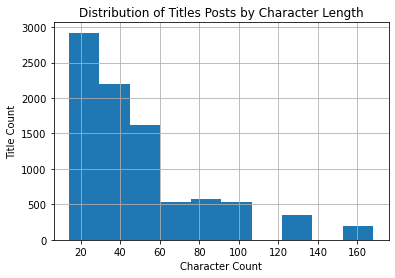

In [75]:
df['title_length'].hist()
plt.title('Distribution of Titles Posts by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Title Count');

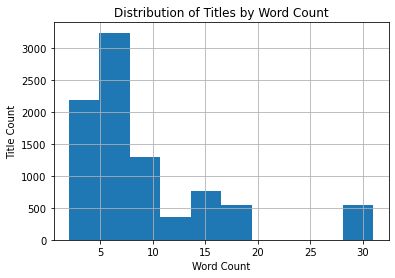

In [76]:
df['title_word_count'].hist()
plt.title('Distribution of Titles by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Title Count');

### EDA Conclusions and Notes